<a href="https://colab.research.google.com/github/rajat1911996sharma/Machine-Learning-Model-Life-Cycle/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Naive Bayes Classifier
'''
###Bayes theorem
[Bayes Theorem Read-up](https://calcworkshop.com/probability/bayes-theorem/)
```
P(A/B) = (P(B/A)*P(A))/P(B)
```
Example Problem
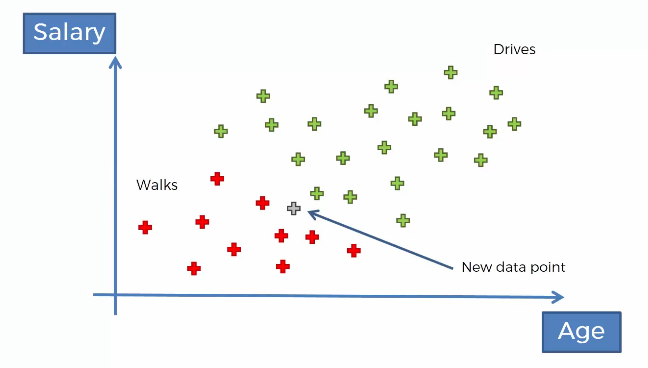

Plan of Attack
we will use Bayes Theorem and apply it twice
```
P(Walks/X)=(P(X/Walks)*P(Walks))/P(X)
where X is features.
```
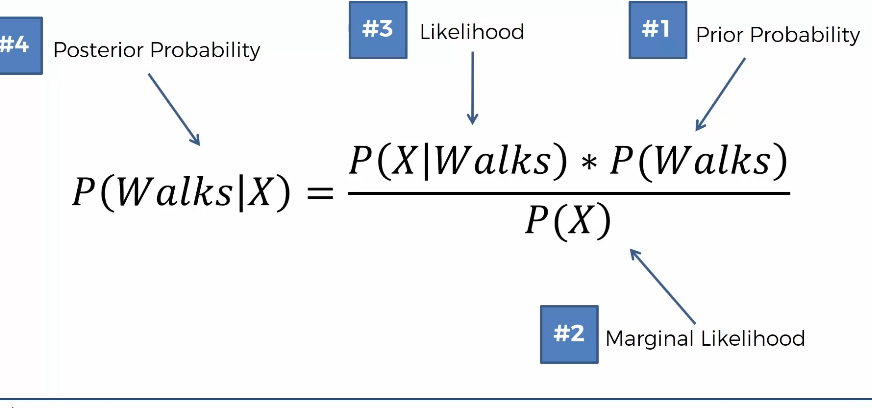

Step 2

```
P(Drives/X) = (P(X/Drives)*P(Drives))/P(X)
where X is features
```
Step 3
Then we will compare the P(Walks/X) vs P(Drives/X)

Step 4
Then we will decide class of that datapoint

'''

Step 1
Prior Probablility
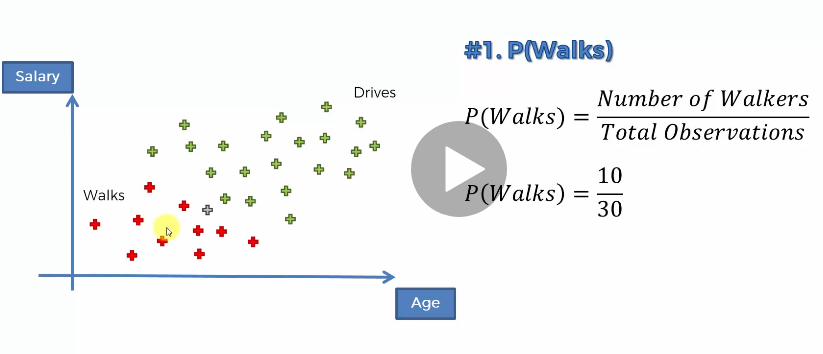

Marginal Likelihood
we select a region around the area like a circle in 2D where the data ponit will added 
 Then we remove the datapoint for just calculation 
 then
 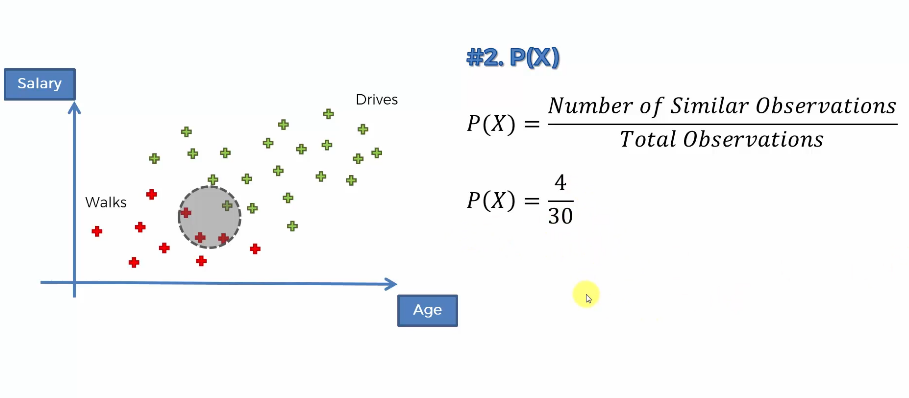

 Likelihood
 Similar to marginal likelihood but thios time we take only the values in walks for calculation
 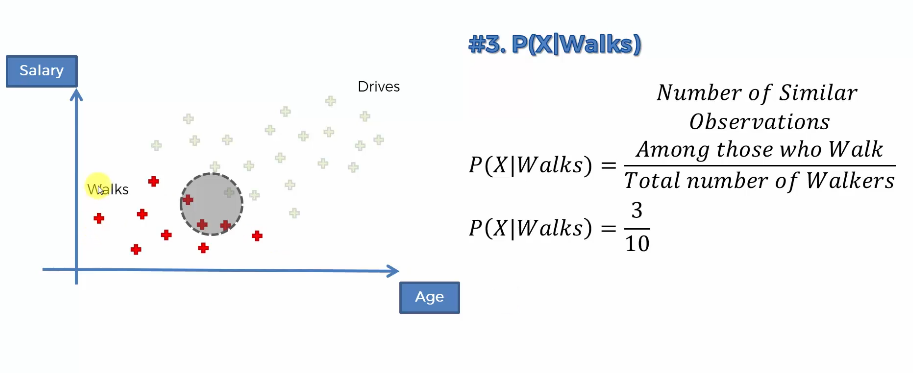

 P(Walks/X) = 0.75

 simlarly we can computre for 
 P(Drives/X) = 0.25

We can see that it is more likely for the datapoint to be classified as a person X who walks than a person who drives

###Q. Why is it called Naive ?

A. Bayes theorem involves independednt assupmtions and therefore the Bayes theorem relies on these assumptions which are not correct sometimes.

in above example, Age and Salary cant be independent as there might be some kind of a correlation between them.

###P(X) or Marginal Likelihood
what is P(X)

it is the randomly selected neighbourhood that will exibit similar features to the data point we are about to add.

###What Happens when we more than 2 classes

It becomes more complicated as with only 2 classes we get sum of total probaility to be 1. 

so, if we can only calculate only one if the probability. Then we can decide.

But it is not possible with three or more classes.

##Data Preprocessing

###Importing Libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###Importing Dataset

In [21]:
df = pd.read_csv('Social_Network_Ads.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

##Splitting the Dataset into Training Ste and Test Set

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.2)

##Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##Training the Naive Bayes model on the Training Set

In [24]:
#we are going to use Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

##Predicting new values

In [25]:
gnb.predict(sc.transform([[30,87000]]))

array([0])

##Predicting Test Set values

In [27]:
pred = gnb.predict(X_test)

##Evaluation of Predictions

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        58
           1       0.86      0.82      0.84        22

    accuracy                           0.91        80
   macro avg       0.89      0.88      0.89        80
weighted avg       0.91      0.91      0.91        80



[[55  3]
 [ 4 18]]


0.9125


##Visulalization of Training Set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


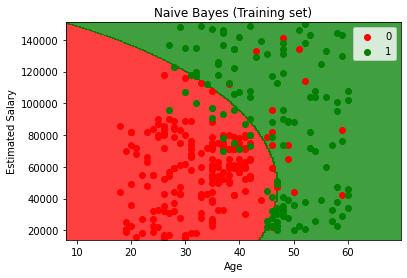

In [29]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, gnb.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

##Visualization of test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


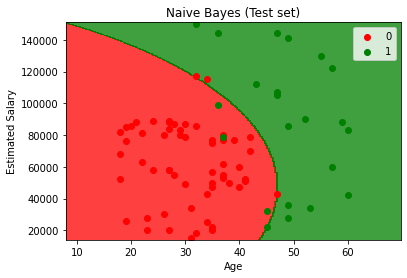

In [30]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, gnb.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()